# Overview

This notebook demonstrates how the figures are made for the manuscript. So that this can be conviently run in the browser without downloading any files, the `excel_files` folder contains Excel files using only 10 resamples at each sample size.

To download all the neural RDMs and excel files using 1,000 resamples used in the manuscript, please download the data from here:

https://osf.io/wsrfh/?view_only=4c7295fa574e474689b983dfceadd6b6 


In [1]:
import piplite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
await piplite.install("seaborn")
await piplite.install("openpyxl")
import seaborn as sns
from scipy.optimize import curve_fit 

sns.set(rc = {'figure.figsize':(12,8)})
sns.set_theme(style="whitegrid")
'''
Set some plot parameters
'''
newRCparams = {
    'font.weight': 'bold',
    'axes.titlesize':'xx-large',
    'axes.titleweight':'bold',
    'axes.labelsize':25,
    'axes.labelweight':'bold',
    'axes.labelpad': 30,
    'xtick.labelsize':20,
    'ytick.labelsize':20,
    'legend.title_fontsize': 'x-large',
    'legend.fontsize':'large',
    'legend.markerscale':2,
    'mathtext.default': 'bf'
    }
plt.rcParams.update(newRCparams)
palette = sns.color_palette(n_colors=6)

In [2]:
# Load in excel data
study = 'Study_1'; region = 'ALE'
dfs = pd.read_excel(f'excel_files/{study}_{region}_small.xlsx',sheet_name=None)

Text(0.5, 1.0, 'Reliability as a function of Stimulus Presentations and Participants')

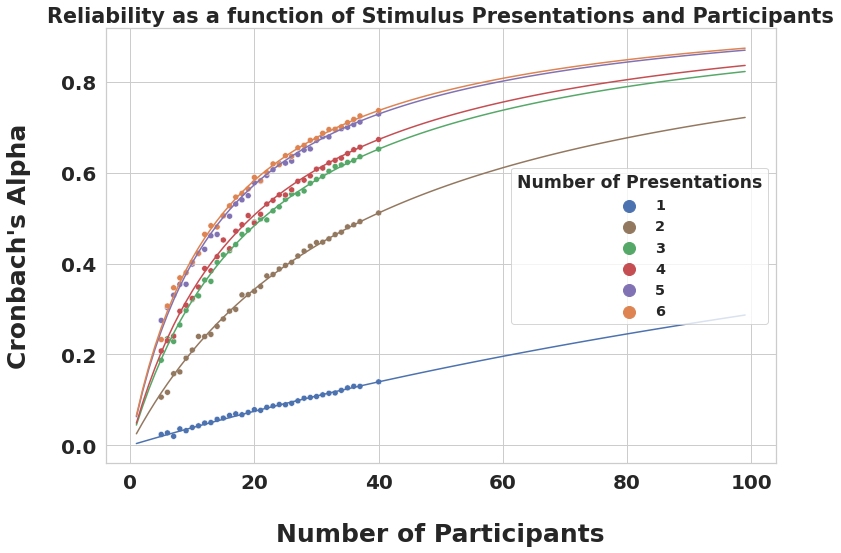

In [3]:
'''
This generates the figure with cronbachs resampled and extrapolates
out icc (Figure 2 in the text)
'''
def sbp(n,r):
    # Spearman-Brown prophecy formula
    out = (n*r) / (1 + (n-1)*r)
    return out
x = np.arange(1,100)
preds = [[sbp(n,dfs['icc2_values'].icc2[k]) for n in x] for k in range(6)]
palette[1], palette[5] = palette[5], palette[1]
tmp = dfs['figure_1_cronbach']
plt.figure()
ax1 = sns.scatterplot(x='numSubj',y='crona',hue='numP', palette=palette,
                      data=tmp.groupby(['numP','numSubj']).mean())
sns.lineplot(x=x,y=preds[0],color=palette[0]); sns.lineplot(x=x,y=preds[1],color=palette[1])
sns.lineplot(x=x,y=preds[2],color=palette[2]); sns.lineplot(x=x,y=preds[3],color=palette[3])
sns.lineplot(x=x,y=preds[4],color=palette[4]); sns.lineplot(x=x,y=preds[5],color=palette[5])
plt.legend(title='Number of Presentations')
plt.xlabel('Number of Participants'); plt.ylabel("Cronbach's Alpha")
plt.title('Reliability as a function of Stimulus Presentations and Participants')

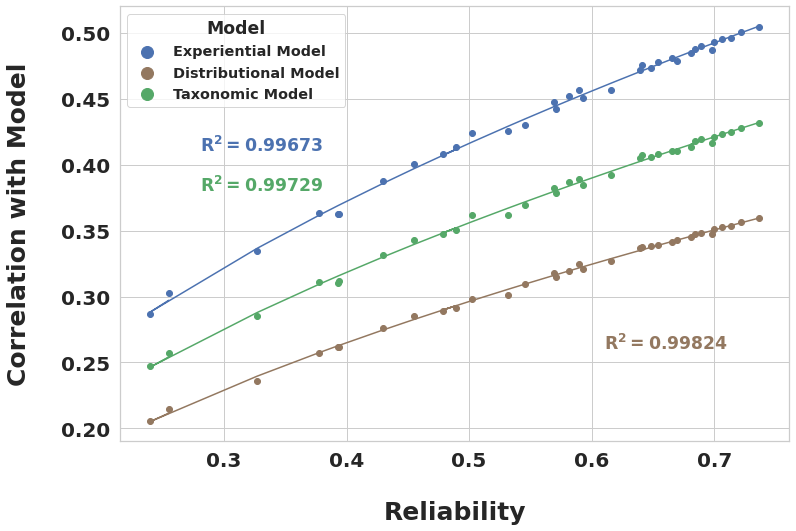

In [4]:
'''
This generates Figure 3 from the text
'''
# Load all the data
tmp = dfs['reliability_and_correlation'].groupby('numSubj').mean()
t1  = tmp.sort_values('numSubj').reliability
t2  = tmp.sort_values('numSubj').Experiential
t3  = tmp.sort_values('numSubj').Distributional
t4  = tmp.sort_values('numSubj').Taxonomic

# Fit a sqrt function to data
def func(x,a):
    return np.sqrt(a*(x))
a1 = curve_fit(func,t1,t2,bounds=(0,np.inf))[0][0]
R1 = np.corrcoef(t2,func(t1,a1))

a2 = curve_fit(func,t1,t3,bounds=(0,np.inf))[0][0]
R2 = np.corrcoef(t3,func(t1,a2))

a3 = curve_fit(func,t1,t4,bounds=(0,np.inf))[0][0]
R3 = np.corrcoef(t4,func(t1,a3))

# Plot data
plt.figure()
plt.plot(t1,func(t1,a1),color=palette[0])
plt.plot(t1,func(t1,a2),color=palette[1])
plt.plot(t1,func(t1,a3),color=palette[2])
plt.scatter(t1,t2, label='Experiential Model', color=palette[0])
plt.scatter(t1,t3, label='Distributional Model',color=palette[1])
plt.scatter(t1,t4, label='Taxonomic Model',color=palette[2])
plt.xlabel('Reliability'); plt.ylabel('Correlation with Model')
plt.legend(title='Model')
if study  == 'Study_1':
    plt.annotate(f'$R^2 = {R1[0,1]**2:.5f}$',[.28,.41],fontsize='x-large',color=palette[0])
    plt.annotate(f'$R^2 = {R2[0,1]**2:.5f}$',[.61,.26],fontsize='x-large',color=palette[1])
    plt.annotate(f'$R^2 = {R3[0,1]**2:.5f}$',[.28,.38],fontsize='x-large',color=palette[2])
if study  == 'Study_2':
    plt.annotate(f'$R^2 = {R1[0,1]**2:.5f}$',[.28,.42],fontsize='x-large',color=palette[0])
    plt.annotate(f'$R^2 = {R2[0,1]**2:.5f}$',[.61,.26],fontsize='x-large',color=palette[1])
    plt.annotate(f'$R^2 = {R3[0,1]**2:.5f}$',[.28,.37],fontsize='x-large',color=palette[2])    

Text(0, 0.5, 'Correlation with Experiential Model')

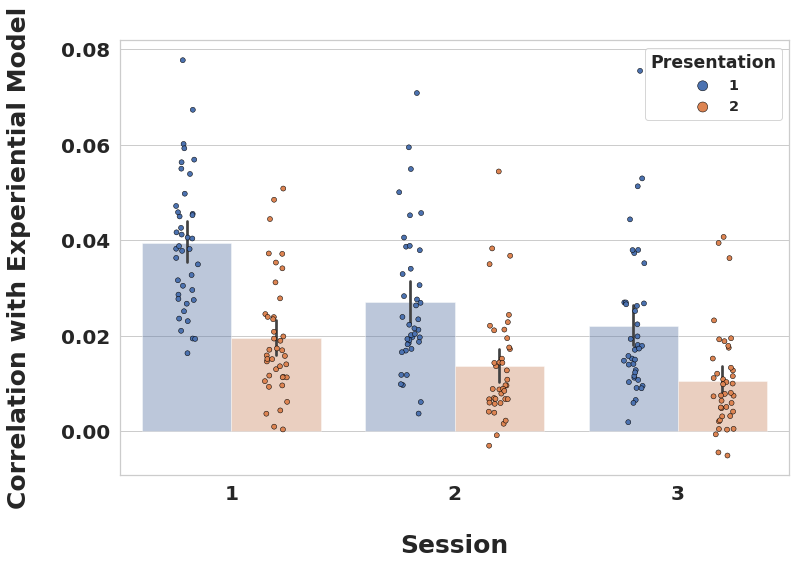

In [5]:
'''
Create figure showing repetition suppression effect (Figure 4 in the text)
    - Can change the semantic model to replicate supplementary figure
'''
semantic_model = 'Experiential' # Choices are: 'Experiential' 'Distributional' or 'Taxonomic'
tmp = dfs['repetition_suppresion']
tmp2 = data=tmp[['subj','pres','ses',semantic_model]]
fig = plt.figure()
ax = fig.add_subplot(111)
sns.barplot(x='ses',y=semantic_model,hue='pres',data=tmp2,alpha=.4)
sns.stripplot(x='ses',y=semantic_model,hue='pres',data=tmp2,
              dodge=True,edgecolor='black',linewidth=.5)
plt.legend(ax.collections[:-2:],['1','2'],title='Presentation')
plt.xlabel('Session'); plt.ylabel(f'Correlation with {semantic_model} Model')

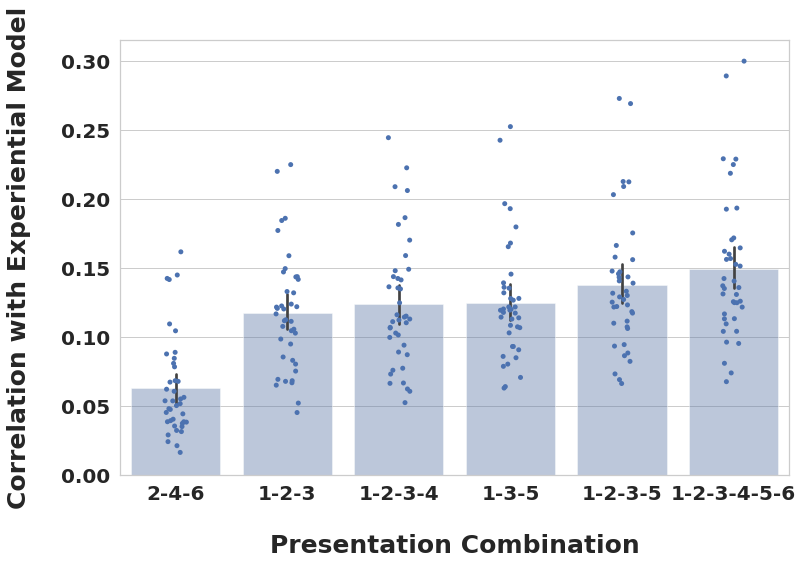

In [6]:
'''
This figure shows different presentation combinations (Figure 5 in the text)
'''
order  = ['icc_246','icc_123','icc_1234','icc_135','icc_1235','icc_123456']
labels = ['2-4-6','1-2-3','1-2-3-4','1-3-5','1-2-3-5','1-2-3-4-5-6']
# Main figure
plt.figure()
tmp = dfs['model_presentation_combinations']
sns.barplot(x='comb',y='Experiential',color=palette[0], data=tmp,alpha=.4,order=order)
sns.stripplot(x='comb',y='Experiential',color=palette[0],data=tmp, order=order)
plt.xticks(ticks=[0,1,2,3,4,5],labels=labels);
plt.xlabel('Presentation Combination'); plt.ylabel('Correlation with Experiential Model');

Text(0, 0.275583950955066, 'Expected Asymptotic Value')

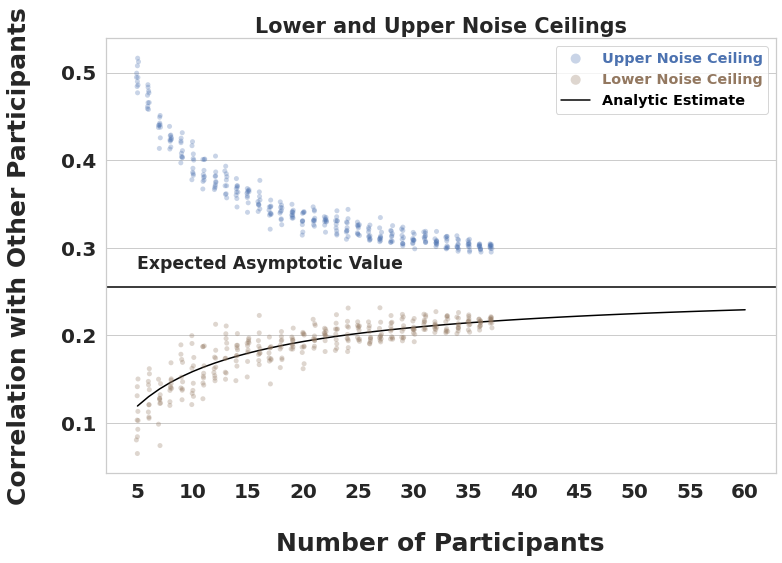

In [7]:
'''
This generates Figure 6 from the text
'''
tmp = dfs['noise_ceiling']
tmp2 = dfs['noise_ceil_estimate']

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.stripplot(x='numSubj',y='value',data=tmp[tmp.measure=='un'],alpha=.3,ax=ax,color=palette[0])
ax = sns.stripplot(x='numSubj',y='value',data=tmp[tmp.measure=='ln'],alpha=.3,ax=ax,color=palette[1])
sns.lineplot(x=np.arange(len(tmp2)),y='eln',data=tmp2, color='black')
plt.legend([plt.gca().collections[0],plt.gca().collections[-2],plt.gca().lines[-1]], 
           ['Upper Noise Ceiling','Lower Noise Ceiling','Analytic Estimate'],labelcolor=palette[:2]+['black']) 
plt.axhline(tmp2.asymptote[0], color='black')
plt.title('Lower and Upper Noise Ceilings'); 
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55],['5','10','15','20','25','30','35','40','45','50','55','60'])
plt.xlabel('Number of Participants')
plt.ylabel('Correlation with Other Participants'); 
plt.annotate('Expected Asymptotic Value',[0,tmp2.asymptote[0]+.02],fontsize='x-large')